#Name - Arjun A.
#Roll number - 181CO109
#Date of submission - 15-01-2021
This notebook was written in google colab. <br>Link to view notebook<br>
https://colab.research.google.com/drive/1qoRcY1C6f_1-hggmCK1zUK4tjb2Ea0aR?usp=sharing

#Machine Learning Lab 1
  Demonstrate working of decision tree based ID3 algorithm, C4.5 algorithm, CART algorithm. Find and compare accuracy of each algorithm. Use the iris dataset. 

##Importing required packages

In [1]:
!pip install numpy
!pip install scipy
!pip install -U scikit-learn
!pip install pandas
!pip install graphviz

     |████████████████████████████████| 22.2MB 6.1MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
import numpy as np 
import pandas as pd 
import graphviz
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.datasets import load_iris

##Importing data from the iris dataset
Using the load_iris function from sklearn, importing the iris dataset

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [3]:
# Function to import data
def importdata(): 

  irisData = load_iris()
  X = irisData.data
  Y = irisData.target
  names = irisData.target_names
  featureName = irisData.feature_names
  print(type(X))
  print(type(Y))
  print(names)
  
  return X, Y, names, featureName

In [4]:
X, Y, irisClassNames, irisFeatureNames = importdata()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']


##Splitting the data into train and test sets
 Splitting the data in the ratio of 7:3. (70% training and 30% testing)

In [5]:
def splitdataset(X, Y): 

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) #Specifying random_state to get the same dataset split everytime 
	
  return X, Y, X_train, X_test, y_train, y_test 

In [6]:
X, Y, X_train, X_test, y_train, y_test = splitdataset(X, Y)

#Use to print the entire dataset
#print(X, Y, X_train, X_test, y_train, y_test, sep = '\n\n')

#Printing size of the split
print('Test dataset size\nX_test -', len(X_test), '\ny_test -', len(y_test), '\n')
print('Train dataset size\nX_train -', len(X_train), '\ny_train -', len(y_train))

Test dataset size
X_test - 45 
y_test - 45 

Train dataset size
X_train - 105 
y_train - 105


##Decision tree - ID3 algorithm
Using sklearn's DecisionTreeClassifier to implement ID3 decision tree algorithm.  <br>
The 'max_depth' parameter is set to 10 i.e maximum depth of the tree is set to 10. <br>
The 'splitter' is set to 'best' to ensure that the attribute with the highest information gain is selected everytime.<br>
The 'random_state' attribute is set to 100 to ensure that the same decision tree is obtained each time.  


In [7]:
modelID3 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, splitter = 'best', random_state = 100)
modelID3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=100)

##Decision tree - C4.5 algorithm
Refer this for program <br>https://github.com/ArjunAnilPillai/scikit-learn-C4.5-tree-classifier.git

In [8]:
#Code to clone package for C4.5 decision tree
!git clone https://github.com/ArjunAnilPillai/scikit-learn-C4.5-tree-classifier.git

Cloning into 'scikit-learn-C4.5-tree-classifier'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 21 (delta 0), reused 2 (delta 0), pack-reused 17
Unpacking objects: 100% (21/21), done.


In [9]:
'''#Code to pull some code from my github
%cd scikit-learn-C4.5-tree-classifier/ 
!ls
!git pull
%cd ..
!ls'''

'#Code to pull some code from my github\n%cd scikit-learn-C4.5-tree-classifier/ \n!ls\n!git pull\n%cd ..\n!ls'

In [10]:
import sys
sys.path.append('/content/scikit-learn-C4.5-tree-classifier')

In [11]:
from c45 import C45
modelC45 = C45(irisFeatureNames)
modelC45.fit(X_train, y_train)

C45(attrNames=['sepallengthcm', 'sepalwidthcm', 'petallengthcm',
               'petalwidthcm'])

##Decision tree - CART algorithm
Using sklearn's DecisionTreeClassifier to implement CART decision tree algorithm.  <br>
The 'maxdepth' parameter is set to 10 i.e maximum depth of the tree is set to 10. <br>
The 'splitter' is set to 'best' to ensure that the attribute with the highest gini index is selected everytime.<br>
The 'random_state' attribute is set to 100 to ensure that the same decision tree is obtained each time.  

In [12]:
modelCART = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, splitter = 'best', random_state = 100)
modelCART.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=100)

##Function to measure accuracy 
Using sklearn's classification_report and accuracy_score.

In [13]:
def measuringAccuracy(y_test, y_predict):
  print('Accuracy -', (accuracy_score(y_test, y_predict) * 100))
  print('Report\n', classification_report(y_test, y_predict))

##Calculating accuracy and generating report for the different algorithms

ID3 decision tree
Accuracy - 95.55555555555556
Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



'ID3_Decision_tree.pdf'

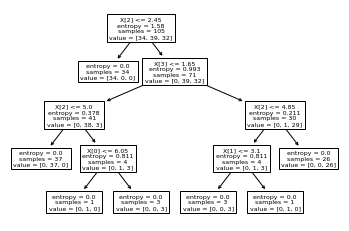

In [14]:
#ID3 decision tree
print("ID3 decision tree")
y_predID3 = modelID3.predict(X_test)
measuringAccuracy(y_test, y_predID3)
plot_tree(modelID3)

#Graphviz for drawing tree
dot_data = export_graphviz(modelID3, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("ID3_Decision_tree") 

In [15]:
#C45 decision tree
print("C45 decision tree")
y_predictC45 = modelC45.predict(X_test)
measuringAccuracy(y_test, y_predictC45)

#Printing XML for the decision tree and copying into .txt file
xmlC45String, xmlC45 = modelC45.printTree()
print(xmlC45String)

# Write xml into file
with open('/content/C45_Decision_tree.txt', 'w') as writefile:
  writefile.write(xmlC45String)

C45 decision tree
Accuracy - 95.55555555555556
Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

<?xml version="1.0" ?>
<DecisionTree>
	<petallengthcm flag="l" p="0.324" value="3.0">0</petallengthcm>
	<petallengthcm flag="r" p="0.676" value="3.0">
		<petalwidthcm flag="l" p="0.577" value="1.7">
			<petallengthcm flag="l" p="0.902" value="5.1">1</petallengthcm>
			<petallengthcm flag="r" p="0.098" value="5.1">
				<sepallengthcm flag="l" p="0.25" value="6.1">1</sepallengthcm>
				<sepallengthcm flag="r" p="0.75" value="6.1">2</sepallengthcm>
			</petallengthcm>
		</petalwidthcm>
		<petalwidthcm flag="r" p="0.423" value="1.7">
			<petallengthcm flag="l" p

CART decision tree
Accuracy - 95.55555555555556
Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



'CART_Decision_tree.pdf'

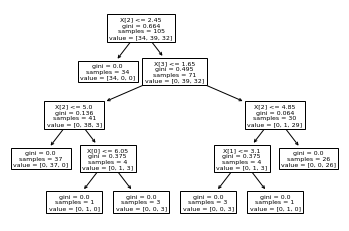

In [16]:
#CART decision tree
print("CART decision tree")
y_predCART = modelCART.predict(X_test)
measuringAccuracy(y_test, y_predCART)
plot_tree(modelCART)

#Graphviz for drawing tree
dot_data = export_graphviz(modelCART, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("CART_Decision_tree") 